In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report,confusion_matrix

In [241]:
df = pd.read_csv('/home/don/Asg4/heart.csv',true_values=['Present'],false_values=['Absent'])#,usecols=['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age','chd'])
df = df.drop('row.names',axis=1)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null bool
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: bool(1), float64(5), int64(4)
memory usage: 33.1 KB


In [207]:
#df.somecolumn = df.somecolumn.astype(int)
df.famhist = df.famhist.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null int64
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.326840,20.496317,101.00,124.0000,134.000,148.0000,218.00
tobacco,462.0,3.635649,4.593024,0.00,0.0525,2.000,5.5000,31.20
ldl,462.0,4.740325,2.070909,0.98,3.2825,4.340,5.7900,15.33
adiposity,462.0,25.406732,7.780699,6.74,19.7750,26.115,31.2275,42.49
famhist,462.0,0.415584,0.493357,0.00,0.0000,0.000,1.0000,1.00
typea,462.0,53.103896,9.817534,13.00,47.0000,53.000,60.0000,78.00
obesity,462.0,26.044113,4.213680,14.70,22.9850,25.805,28.4975,46.58
alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.510,23.8925,147.19
age,462.0,42.816017,14.608956,15.00,31.0000,45.000,55.0000,64.00
chd,462.0,0.346320,0.476313,0.00,0.0000,0.000,1.0000,1.00


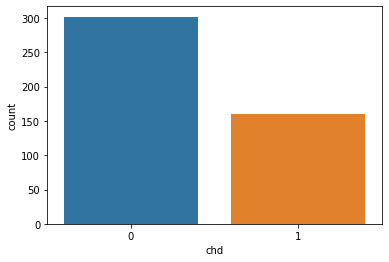

In [210]:
sns.countplot(x='chd',data=df)

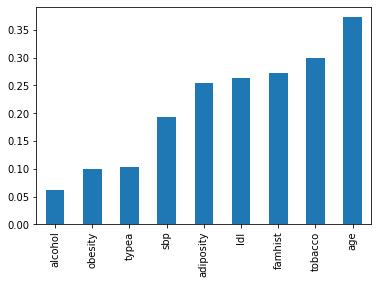

In [211]:
df.corr()['chd'][:-1].sort_values().plot(kind='bar')

In [212]:
X= df.drop('chd',axis=1).values

In [213]:
y=df['chd'].values

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=19)

In [215]:
scaler = MinMaxScaler()

In [216]:
X_train = scaler.fit_transform(X_train)

In [217]:
X_test = scaler.transform(X_test)

In [240]:
heart_X_train = pd.DataFrame(X_train).to_csv('~/Asg4/heart_X_train.csv')
heart_X_test = pd.DataFrame(X_test).to_csv('~/Asg4/heart_X_test.csv')
heart_y_train = pd.DataFrame(y_train).to_csv('~/Asg4/heart_y_train.csv')
heart_y_test = pd.DataFrame(y_test).to_csv('~/Asg4/heart_y_test.csv')

In [218]:
X_train.shape

(392, 9)

In [219]:
#explore overfit

model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))

#binary classification = sigmoid
model.add(Dense(1,activation='sigmoid')) #somewhere between 0 and 1
#rms = tf.keras.optimizers.RMSprop(0.001)
adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',optimizer=adam)

In [220]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)#

In [221]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 392 samples, validate on 70 samples
Epoch 1/600
392/392 [==============================] - 2s 5ms/sample - loss: 0.2791 - val_loss: 0.2303
Epoch 2/600
392/392 [==============================] - 0s 197us/sample - loss: 0.2559 - val_loss: 0.2287
Epoch 3/600
392/392 [==============================] - 0s 183us/sample - loss: 0.2597 - val_loss: 0.2273
Epoch 4/600
392/392 [==============================] - 0s 208us/sample - loss: 0.2581 - val_loss: 0.2269
Epoch 5/600
392/392 [==============================] - 0s 204us/sample - loss: 0.2440 - val_loss: 0.2265
Epoch 6/600
392/392 [==============================] - 0s 205us/sample - loss: 0.2433 - val_loss: 0.2260
Epoch 7/600
392/392 [==============================] - 0s 203us/sample - loss: 0.2361 - val_loss: 0.2252
Epoch 8/600
392/392 [==============================] - 0s 219us/sample - loss: 0.2489 - val_loss: 0.2241
Epoch 9/600
392/392 [==============================] - 0s 200us/sample - loss: 0.2586 - val_loss: 0.2239
Epoch 10/600

Epoch 78/600
392/392 [==============================] - 0s 265us/sample - loss: 0.2231 - val_loss: 0.1920
Epoch 79/600
392/392 [==============================] - 0s 202us/sample - loss: 0.2134 - val_loss: 0.1919
Epoch 80/600
392/392 [==============================] - 0s 185us/sample - loss: 0.2195 - val_loss: 0.1917
Epoch 81/600
392/392 [==============================] - 0s 185us/sample - loss: 0.2203 - val_loss: 0.1919
Epoch 82/600
392/392 [==============================] - 0s 170us/sample - loss: 0.2105 - val_loss: 0.1925
Epoch 83/600
392/392 [==============================] - 0s 158us/sample - loss: 0.2075 - val_loss: 0.1929
Epoch 84/600
392/392 [==============================] - 0s 320us/sample - loss: 0.2151 - val_loss: 0.1933
Epoch 85/600
392/392 [==============================] - 0s 229us/sample - loss: 0.2141 - val_loss: 0.1929
Epoch 86/600
392/392 [==============================] - 0s 216us/sample - loss: 0.2052 - val_loss: 0.1918
Epoch 87/600
392/392 [========================

Epoch 155/600
392/392 [==============================] - 0s 199us/sample - loss: 0.2064 - val_loss: 0.1831
Epoch 156/600
392/392 [==============================] - 0s 163us/sample - loss: 0.2169 - val_loss: 0.1828
Epoch 157/600
392/392 [==============================] - 0s 145us/sample - loss: 0.2127 - val_loss: 0.1828
Epoch 158/600
392/392 [==============================] - 0s 171us/sample - loss: 0.2050 - val_loss: 0.1830
Epoch 159/600
392/392 [==============================] - 0s 149us/sample - loss: 0.2054 - val_loss: 0.1827
Epoch 160/600
392/392 [==============================] - 0s 176us/sample - loss: 0.2116 - val_loss: 0.1823
Epoch 161/600
392/392 [==============================] - 0s 152us/sample - loss: 0.2154 - val_loss: 0.1826
Epoch 162/600
392/392 [==============================] - 0s 180us/sample - loss: 0.2051 - val_loss: 0.1825
Epoch 163/600
392/392 [==============================] - 0s 208us/sample - loss: 0.2109 - val_loss: 0.1823
Epoch 164/600
392/392 [==============

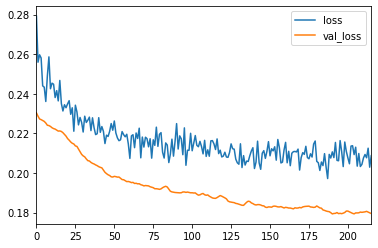

In [222]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [223]:
model.predict_classes(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [224]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        50
           1       1.00      0.20      0.33        20

    accuracy                           0.77        70
   macro avg       0.88      0.60      0.60        70
weighted avg       0.83      0.77      0.71        70



In [225]:
#best model
#model = Sequential()

model.add(Dense(9,activation='relu'))#relu
model.add(Dropout(0.2))
model.add(Dense(9,activation='relu'))

model.add(Dense(9,activation='relu'))

model.add(Dense(9,activation='relu'))
model.add(Dense(5,activation='relu'))

#binary classification = sigmoid
model.add(Dense(1,activation='sigmoid')) #somewhere between 0 and 1
rms = tf.keras.optimizers.RMSprop(0.001)
adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='mse',optimizer=rms, metrics=['accuracy'])

In [226]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [227]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 392 samples, validate on 70 samples
Epoch 1/600
392/392 [==============================] - 1s 3ms/sample - loss: 0.2476 - acc: 0.6505 - val_loss: 0.2440 - val_acc: 0.7286
Epoch 2/600
392/392 [==============================] - 0s 243us/sample - loss: 0.2432 - acc: 0.6607 - val_loss: 0.2361 - val_acc: 0.7143
Epoch 3/600
392/392 [==============================] - 0s 191us/sample - loss: 0.2381 - acc: 0.6429 - val_loss: 0.2317 - val_acc: 0.7143
Epoch 4/600
392/392 [==============================] - 0s 236us/sample - loss: 0.2340 - acc: 0.6505 - val_loss: 0.2262 - val_acc: 0.7143
Epoch 5/600
392/392 [==============================] - 0s 184us/sample - loss: 0.2299 - acc: 0.6709 - val_loss: 0.2228 - val_acc: 0.7143
Epoch 6/600
392/392 [==============================] - 0s 255us/sample - loss: 0.2272 - acc: 0.6556 - val_loss: 0.2181 - val_acc: 0.7143
Epoch 7/600
392/392 [==============================] - 0s 228us/sample - loss: 0.2245 - acc: 0.6480 - val_loss: 0.2117 - val_acc: 0.714

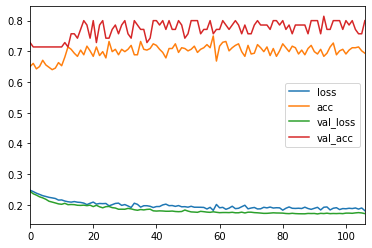

In [228]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [229]:
model.predict_classes(X_test)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [230]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       1.00      0.30      0.46        20

    accuracy                           0.80        70
   macro avg       0.89      0.65      0.67        70
weighted avg       0.84      0.80      0.76        70



In [231]:
print(confusion_matrix(y_test,predictions))

[[50  0]
 [14  6]]


In [233]:
model.save("3.h")